# Question 1:

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

## Data Exploration

In [65]:
# reading the csv
df = pd.read_csv(r'C:\Github\Machine-Learning\Data\hvac.csv')

In [66]:
df.head()

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Building Type,HVAC System,Average Temperature in last 24 hours (C),Energy Consumption (kWh)
0,270,15,30,2.0,Residential,Central AC,28,380
1,273,20,28,1.5,Commercial,Split AC,26,420
2,276,18,26,1.8,Residential,Window AC,24,390
3,276,12,32,2.5,Residential,Central AC,32,320
4,276,22,20,1.2,Commercial,Split AC,18,480


In [67]:
df.tail()

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Building Type,HVAC System,Average Temperature in last 24 hours (C),Energy Consumption (kWh)
40,274,20,28,1.5,Commercial,Split AC,28,420
41,277,18,22,1.8,Residential,Window AC,22,410
42,273,12,32,2.5,Residential,Central AC,32,320
43,277,22,20,1.2,Residential,Split AC,20,480
44,275,16,18,1.9,Residential,Window AC,18,400


In [68]:
df.sample(5)

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Building Type,HVAC System,Average Temperature in last 24 hours (C),Energy Consumption (kWh)
31,276,16,18,1.9,Residential,Split AC,18,390
20,274,16,18,1.9,Commercial,Window AC,18,400
30,275,20,28,1.5,Residential,Central AC,28,420
0,270,15,30,2.0,Residential,Central AC,28,380
38,273,17,25,2.0,Residential,Window AC,25,380


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Room Area (sq. ft.)                       45 non-null     int64  
 1   Number of Appliances                      45 non-null     int64  
 2   Outside Temperature (C)                   45 non-null     int64  
 3   Insulation Thickness (inches)             45 non-null     float64
 4   Building Type                             45 non-null     object 
 5   HVAC System                               45 non-null     object 
 6   Average Temperature in last 24 hours (C)  45 non-null     int64  
 7   Energy Consumption (kWh)                  45 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.9+ KB


**Infrence:**

There are no null values present in the data. There are 45 entries.

In [70]:
# Locking at the statistics:
df.describe()

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Average Temperature in last 24 hours (C),Energy Consumption (kWh)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,274.822222,17.577778,23.044444,1.782222,22.844444,407.111111
std,1.556349,3.026316,6.201010,0.376158,6.226613,46.837350
min,270.000000,12.000000,10.000000,1.100000,10.000000,320.000000
25%,274.000000,16.000000,18.000000,1.500000,18.000000,380.000000
50%,275.000000,18.000000,23.000000,1.800000,23.000000,400.000000
75%,276.000000,20.000000,28.000000,2.000000,28.000000,430.000000
max,277.000000,23.000000,33.000000,2.500000,33.000000,510.000000


In [71]:
new.corr()

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Average Temperature in last 24 hours (C),Energy Consumption (kWh),Building Type_ Residential,HVAC System_ Split AC,HVAC System_ Window AC
Room Area (sq. ft.),1.000000,0.056081,0.026742,-0.055989,0.032260,0.039561,0.060953,0.204209,0.051052
Number of Appliances,0.056081,1.000000,-0.514895,-0.981021,-0.517361,0.956444,-0.404142,0.399072,-0.246795
Outside Temperature (C),0.026742,-0.514895,1.000000,0.545982,0.992592,-0.654513,0.127302,-0.035877,0.087130
Insulation Thickness (inches),-0.055989,-0.981021,0.545982,1.000000,0.553828,-0.979500,0.403505,-0.422456,0.287270
Average Temperature in last 24 hours (C),0.032260,-0.517361,0.992592,0.553828,1.000000,-0.656186,0.147999,-0.051042,0.086772
Energy Consumption (kWh),0.039561,0.956444,-0.654513,-0.979500,-0.656186,1.000000,-0.363122,0.339281,-0.251068
Building Type_ Residential,0.060953,-0.404142,0.127302,0.403505,0.147999,-0.363122,1.000000,-0.533002,0.213201
HVAC System_ Split AC,0.204209,0.399072,-0.035877,-0.422456,-0.051042,0.339281,-0.533002,1.000000,-0.500000
HVAC System_ Window AC,0.051052,-0.246795,0.087130,0.287270,0.086772,-0.251068,0.213201,-0.500000,1.000000


In [72]:
corel = df.corr()

<AxesSubplot:>

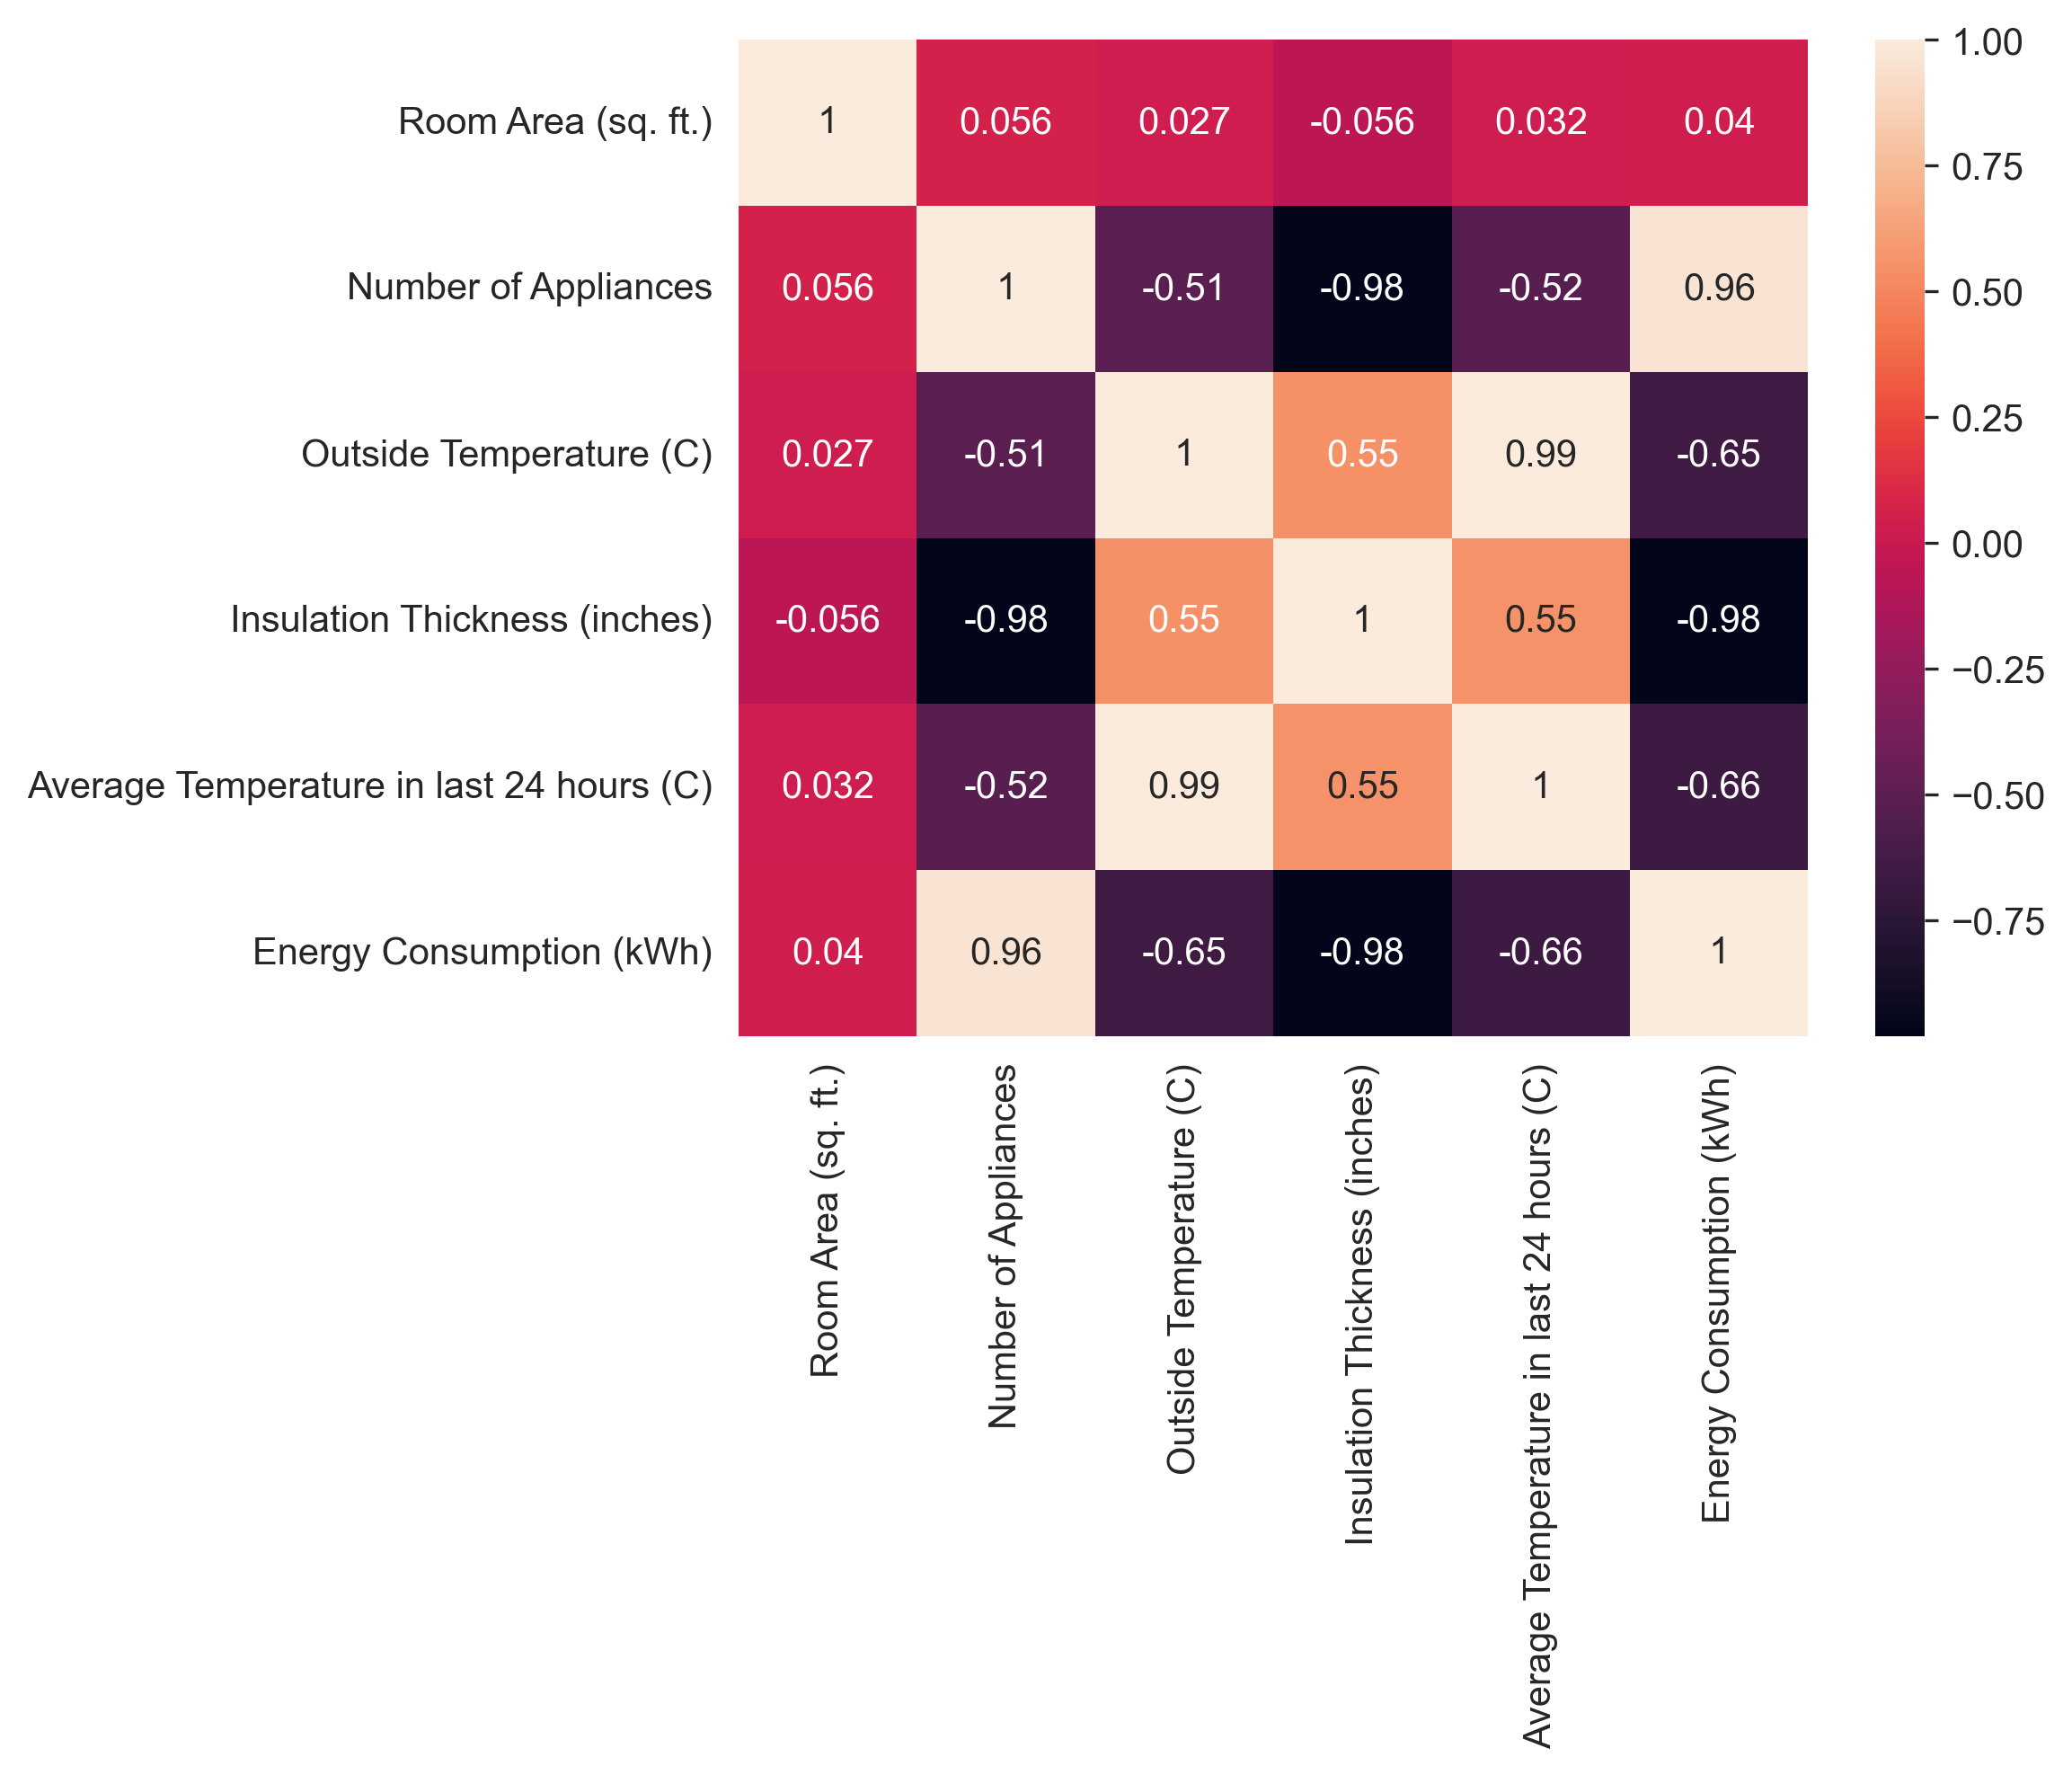

In [73]:
sns.heatmap(corel,annot= True)

## Data Preprocessing:

In [74]:
# turning the categorical variables into 0 and 1
new = pd.get_dummies(df, columns=['Building Type', 'HVAC System'],
 drop_first=True)
# looking at the encoded dataframe
new.head()

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Average Temperature in last 24 hours (C),Energy Consumption (kWh),Building Type_ Residential,HVAC System_ Split AC,HVAC System_ Window AC
0,270,15,30,2.0,28,380,1,0,0
1,273,20,28,1.5,26,420,0,1,0
2,276,18,26,1.8,24,390,1,0,1
3,276,12,32,2.5,32,320,1,0,0
4,276,22,20,1.2,18,480,0,1,0


## Splitting the data:

In [75]:
x = new.drop("Energy Consumption (kWh)",axis = 1)
y = new['Energy Consumption (kWh)']

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 23)

## Fitting the model

In [77]:
mlr = LinearRegression()
mlr.fit(x,y)

LinearRegression()

In [78]:
# chcking the accuracy of the point1, point2, point3

# data for the points
d = {
 'Room Area (sq. ft.)': [279, 277, 276],
 'Number of Appliances': [16, 22, 14],
 'Outside Temperature (C)': [20, 15, 25],
 'Insulation Thickness (inches)': [1.7, 1.5, 2.2],
 'Average Temperature in last 24 hours (C)': [19, 14, 26],
 'Building Type_ Residential': [True, False, True],
 'HVAC System_ Split AC': [False, True, False],
 'HVAC System_ Window AC': [False, False, True],
 'Energy Consumption (kWh)': [385, 425, 350]
}


In [79]:
# Creating a DataFrame
points = pd.DataFrame(d)
display(points.head())

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Average Temperature in last 24 hours (C),Building Type_ Residential,HVAC System_ Split AC,HVAC System_ Window AC,Energy Consumption (kWh)
0,279,16,20,1.7,19,True,False,False,385
1,277,22,15,1.5,14,False,True,False,425
2,276,14,25,2.2,26,True,False,True,350


In [80]:
# creating a variable containing independent variables (Xs)
x_points = points.drop("Energy Consumption (kWh)",axis=1)
# creating a variable containing dependent variable (Y)
y_points = points['Energy Consumption (kWh)']
display(x_points.head(),y_points.head())

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Average Temperature in last 24 hours (C),Building Type_ Residential,HVAC System_ Split AC,HVAC System_ Window AC
0,279,16,20,1.7,19,True,False,False
1,277,22,15,1.5,14,False,True,False
2,276,14,25,2.2,26,True,False,True


0    385
1    425
2    350
Name: Energy Consumption (kWh), dtype: int64

In [83]:
ypred_points = mlr.predict(x_points)
mse_test = mean_squared_error(y_points, ypred_points)
print("Mean Squared Error (MSE) for the Test Set:", mse_test)


Mean Squared Error (MSE) for the Test Set: 623.0621796629765


# Question 2:

In [84]:
# imports 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [87]:
X = [[2, 2], [4, 4],[6, 2],[4, 6],[6, 6],[6, 8]]
y = [1, 2, 1, 1, 2, 1]

knn_c1 = KNeighborsClassifier(n_neighbors=1)
knn_c3 = KNeighborsClassifier(n_neighbors=3)

knn_c1.fit(X, y)
knn_c3.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [88]:
new_points = [[8, 6], [8, 4]]

In [89]:
pred_k1 = knn_c1.predict(new_points)
pred_k3 = knn_c3.predict(new_points)

c:\Users\PRANJAL\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\PRANJAL\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [92]:
print("K=1 Classifications:")
for i, p in enumerate(new_points):
    print(f"Point ({p[0]}, {p[1]}): {pred_k1[i]}")

K=1 Classifications:
Point (8, 6): 2
Point (8, 4): 1


In [93]:
print("\nK=3 Classifications:")
for i, p in enumerate(new_points):
    print(f"Point ({p[0]}, {p[1]}): {pred_k3[i]}")


K=3 Classifications:
Point (8, 6): 1
Point (8, 4): 2


# Question 3

In [110]:
import numpy as np

# Define the dataset with numeric labels
dataset = np.array([
    [8.27, 5.59, 1],  
    [1.58, 5.87, 0],  
    [5.92, 5.87, 0],
    [9.44, 5.83, 1],
    [2.11, 5.57, 0],
    [4.71, 5.94, 1],
    [3.82, 5.84, 1],
    [6.98, 5.91, 0],
    [3.15, 5.42, 0],
    [8.9, 5.94, 0],
    [7.65, 5.77, 1],
    [9.83, 5.29, 0],
    [1.94, 5.36, 1],
    [7.13, 5.28, 0],
    [5.77, 5.47, 0],
    [4.36, 5.31, 1],
    [5.09, 5.65, 0],
    [3.42, 5.24, 1],
    [2.76, 5.71, 1],
    [9.6, 5.52, 0]
])

# Function to predict labels using KNN algorithm and return indices of closest neighbors
def predict_labels_with_indices(dataset, points, k):
    predicted_labels = []
    nearest_neighbors_indices = []
    for point in points:
        distances = np.sqrt(np.sum((dataset[:, :2] - point) ** 2, axis=1))  # Calculate distances
        nearest_indices = np.argsort(distances)[:k]  # Indices of k nearest neighbors
        nearest_neighbors_indices.append(nearest_indices)  # Store indices of nearest neighbors
        nearest_labels = dataset[nearest_indices, 2].astype(int)  # Convert labels to integers
        predicted_label = np.argmax(np.bincount(nearest_labels))  # Majority label
        predicted_labels.append(predicted_label)
    return predicted_labels, nearest_neighbors_indices

# Points to predict
points = np.array([
    [7.81, 5.33],
    [9.43, 5.29]
])

# Predict labels and find indices of closest neighbors for the points with K=3
predicted_labels, nearest_neighbors_indices = predict_labels_with_indices(dataset, points, 3)

# Map predicted label index to actual label
label_mapping = {1: '+', 0: '-'}  # Mapping 1 to '+' and 0 to '-'
predicted_labels = [label_mapping[label_index] for label_index in predicted_labels]

print("Predicted labels for point1 and point2 (with K=3):", predicted_labels)
print("Indices of closest neighbors for point1:", nearest_neighbors_indices[0])
print("Indices of closest neighbors for point2:", nearest_neighbors_indices[1])

Predicted labels for point1 and point2 (with K=3): ['+', '-']
Indices of closest neighbors for point1: [10  0 13]
Indices of closest neighbors for point2: [19 11  3]
